In [1]:
import antenna_new_backup
import numpy as np
import matplotlib.pyplot as plt
import time
import os
import glob
import numpy as np
from tensorflow.keras.utils import  plot_model
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from PIL import Image, ImageDraw
import pandas as pd
import seaborn as sns
from keras.callbacks import ModelCheckpoint
import keras.callbacks
import tensorflow.keras.losses
import os
import pydot
0.228
0.08

0.08

In [2]:
N = 10
Grid_size = 10000
d = 1/2

In [3]:
rel = 1.22/(d*(N-1))

In [4]:
antenna1 = antenna_new_backup.antenna(N, Grid_size, random_distr = False, antenna_type = 'non-directional')

In [5]:
a = antenna1.cosine_Amplitude_distr(1,1)

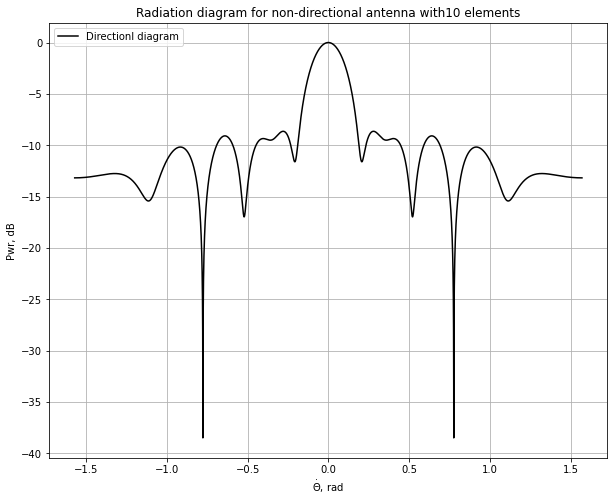

In [6]:
antenna1.plot_dd()

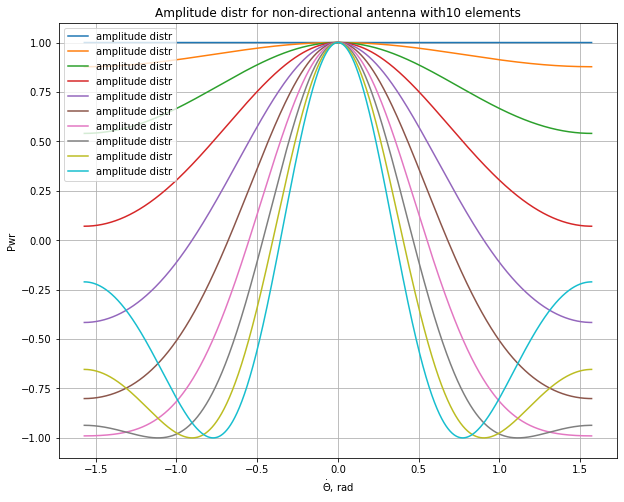

In [7]:
antenna1.plot_distr()

Capon_out
4858
Noise_out
4934
Capon_out
4870
Noise_out
4942
Capon_out
4878
Noise_out
4950
Capon_out
4890
Noise_out
4954
Capon_out
4898
Noise_out
4962
Capon_out
4906
Noise_out
4966
Capon_out
4914
Noise_out
4970
Capon_out
4922
Noise_out
4974
Capon_out
4926
Noise_out
4974
Capon_out
4934
Noise_out
4978
Capon_out
4938
Noise_out
4982
Capon_out
4946
Noise_out
4982
Capon_out
4950
Noise_out
4986
Capon_out
4954
Noise_out
4986
Capon_out
4958
Noise_out
4990
Capon_out
4962
Noise_out
4990
Capon_out
4966
Noise_out
4990
Capon_out
4966
Noise_out
4994
Capon_out
4970
Noise_out
4994
Capon_out
4974
Noise_out
4994


Text(0, 0.5, '${\\Delta_{rel}}/{\\Delta\\Theta}$')

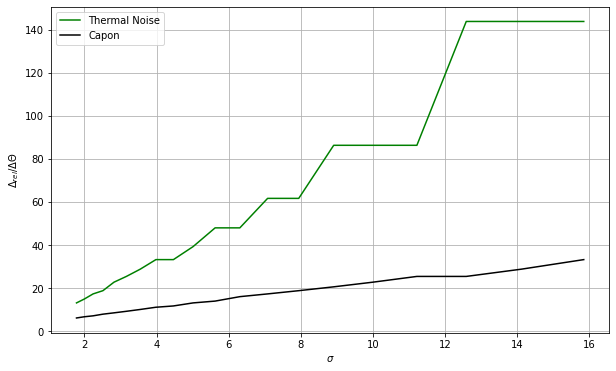

In [8]:
bool_MUSIC = 0
bool_Noise = 1
bool_Capon = 1
Grid = antenna1.get_Grid()
MUSIC = np.zeros(np.shape(Grid))
Capon = np.zeros(np.shape(Grid))
Noise = np.zeros(np.shape(Grid))
loc1 = Grid[0,500]
loc2 = -loc1
n_Capon = 0
n_music = 0
n_Noise = 0
sigmas = []
MUSICS = []
NOISES = []
CAPONS = []
'''
tic = time.perf_counter()
c = model.predict(test_gen,steps=len(train_idx))
toc = time.perf_counter()
time = abs(tic-toc)
'''
antenna1.set_interference(loc1,1)
antenna1.set_interference(loc2,1)
a = 4030
for s in range(5,25,1):
    for i in range(a,Grid_size//2-1,4):
        if bool_Capon ==0:
            if bool_MUSIC == 0:
                if bool_Noise == 0:
                    a = min([n_Capon,n_Noise])
                    break
        loc1 = Grid[0,i]
        loc2 = Grid[0,Grid_size-i]
        antenna1.reset_interference(loc1,s/2)
        antenna1.set_interference(loc2,s/2)
        
        if bool_Capon == 1:
            Capon = antenna1.adapt_Capon()
            if (abs(Capon[int(Grid_size//2)]-Capon[i])<3 or Capon[i]<Capon[int(Grid_size//2)]):
                n_Capon = i
                bool_Capon = 0
                print('Capon_out')
                print(n_Capon)

        if bool_Noise == 1:
            Noise = antenna1.Thermal_noise()
            if (abs(Noise[int(Grid_size//2)]-Noise[i])<3 or Noise[i]<Noise[int(Grid_size//2)]):
                n_Noise = i
                bool_Noise = 0
                print('Noise_out')
                print(n_Noise)

        if bool_MUSIC == 1:
            MUSIC = antenna1.MUSIC()
            if (abs(MUSIC[int(Grid_size//2)]-MUSIC[i])<3 or MUSIC[i]<MUSIC[int(Grid_size//2)]):
                n_music = i
                bool_MUSIC = 0
                print('MUSIC_out')
                print(n_music)
    sigmas.append(10**(s/20))
    MUSICS.append(rel/(((Grid_size//2-n_music)/Grid_size)*np.pi*1))
    NOISES.append((rel/np.pi)/((Grid_size//2-n_Noise)/Grid_size))
    CAPONS.append((rel/np.pi)/((Grid_size//2-n_Capon)/Grid_size))
    bool_MUSIC = 0
    bool_Noise = 1
    bool_Capon = 1

fig1, ax1 = plt.subplots(1,1,figsize=(10,6))
#linem, = ax1.plot(sigmas,MUSICS,'blue',  label='MUSIC')
linen, = ax1.plot(sigmas,NOISES,'green', label='Thermal Noise')
linec, = ax1.plot(sigmas,CAPONS,'black', label='Capon')
ax1.legend(loc='upper left')
ax1.grid(True)
ax1.legend(handles=[linen,linec])
ax1.set_xlabel(r"${\sigma}$")
ax1.set_ylabel(r"${\Delta_{rel}}/{\Delta\Theta}$")

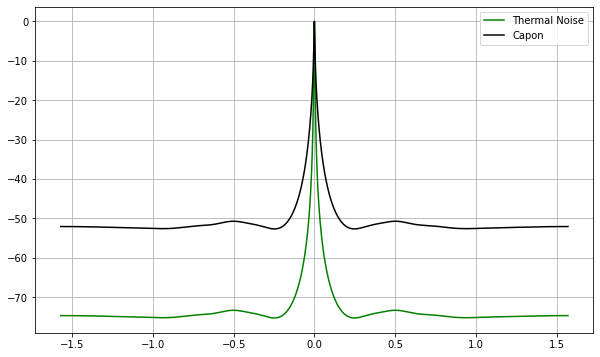

In [9]:
Noise = antenna1.Thermal_noise()
Capon = antenna1.adapt_Capon()
fig2, ax2 = plt.subplots(1,1,figsize=(10,6))
#linem2, = ax2.plot(Grid,MUSIC,'blue',  label='MUSIC')
linen2, = ax2.plot(np.array(Grid).transpose(),np.array(Noise),'green', label='Thermal Noise')
linec2, = ax2.plot(np.array(Grid).transpose(),np.array(Capon),'black', label='Capon')
ax2.legend(loc='upper left')
ax2.grid(True)
ax2.legend(handles=[linen2,linec2])


In [10]:
NOISES

[13.075355594081636,
 14.878852917403242,
 17.25946938418776,
 18.760292808899738,
 22.709828137089158,
 25.38157262380553,
 28.7657823069796,
 33.191287277284154,
 33.191287277284154,
 39.22606678224491,
 47.942970511632666,
 47.942970511632666,
 61.64096208638485,
 61.64096208638485,
 86.29734692093879,
 86.29734692093879,
 86.29734692093879,
 143.828911534898,
 143.828911534898,
 143.828911534898]

In [13]:
#model = tf.keras.models.load_model(r'C:\Users\densh\Desktop\neuroinfo\models\model12')


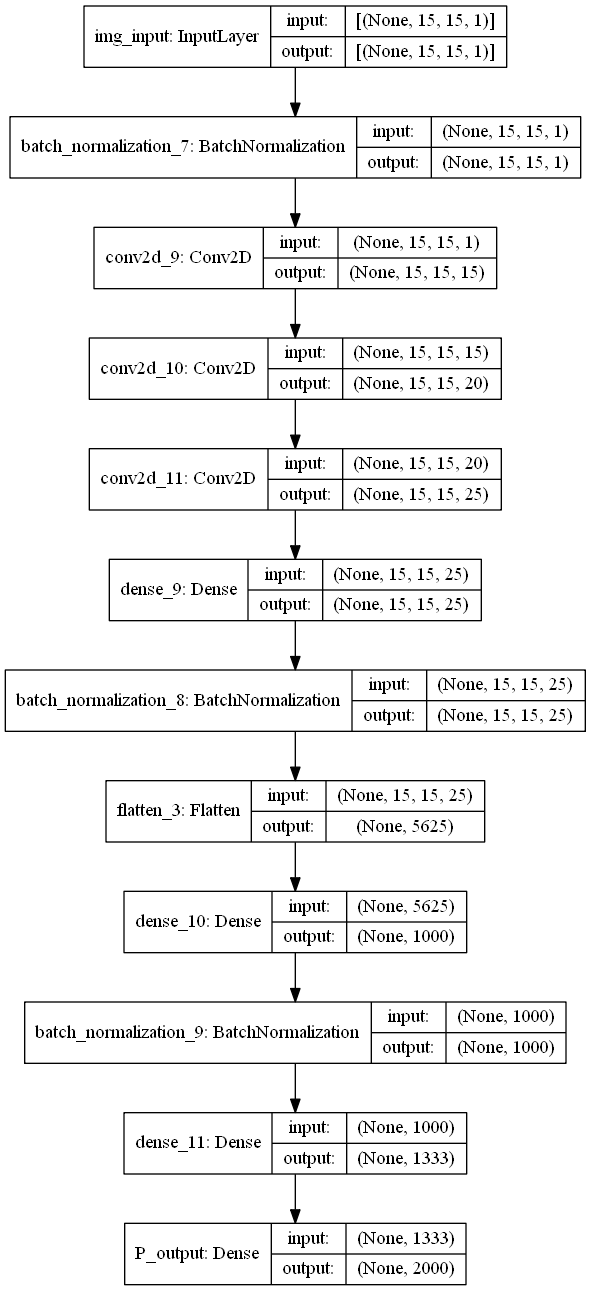

In [15]:
#plot_model(model,to_file='model.png',show_shapes=True)

In [12]:
bool_MUSIC = 1
bool_Noise = 1
bool_Capon = 1
Grid = antenna1.get_Grid()
MUSIC = np.zeros(np.shape(Grid))
Capon = np.zeros(np.shape(Grid))
Noise = np.zeros(np.shape(Grid))
loc1 = Grid[1050]
loc2 = -loc1
antenna1.set_interference(loc1,10)
antenna1.set_interference(loc2,10)
MUSIC = antenna1.MUSIC()
Noise = antenna1.Thermal_noise()
Capon = antenna1.adapt_Capon()

IndexError: index 1050 is out of bounds for axis 0 with size 1

In [13]:
results = model.predict(np.reshape([np.array(antenna1.return_overall_cov())],[1,15,15,1]))

NameError: name 'model' is not defined

Text(0, 0.5, '${\\Delta_{rel}}/{\\Delta\\Theta}$')

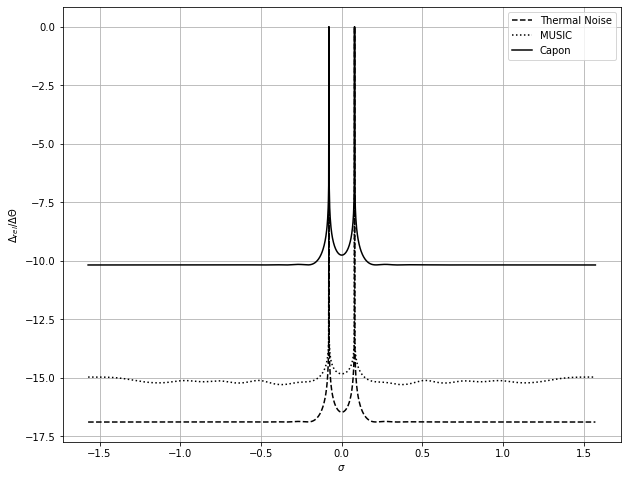

In [11]:

fig = plt.figure(figsize=(10,8))
ax1 = fig.add_subplot(111)
linen, = ax1.plot(Grid,MUSIC.transpose()/10,'black', label='MUSIC', ls = ':')
linem, = ax1.plot(Grid,Noise.transpose()/10,'black', label='Thermal Noise', ls='--')
linec, = ax1.plot(Grid,Capon.transpose()/10,'black', label='Capon')
#ax.set_title('Directional diagram for ' + self.type + ' antenna with' + str(self.N) + ' elements')
ax1.grid(True)
ax1.legend(handles=[linem,linen,linec])
ax1.set_xlabel(r"${\sigma}$")
ax1.set_ylabel(r"${\Delta_{rel}}/{\Delta\Theta}$")

In [7]:
C = [0] * (2 + 2)
C

[0, 0, 0, 0]

In [6]:
if np.shape(1/2) == ():
    print('a')

a
